In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, get_single_color_func
# import plotly.plotly as py
# import plotly.graph_objs as go

In [2]:
# read data 
df = pd.read_csv('../data/hw1_data.csv')

In [3]:
df.columns

Index(['Timestamp',
       'In one sentence describe how you feel about this program. (for sentiment analysis)',
       'Which programming language are you most comfortable using to make data visualizations?',
       'What is your favorite type of plot to make?', 'Are you colorblind?',
       'How old are you?', 'Where are you from?',
       'How difficult is it for you to make a barplot?',
       'What's your favorite visualization package?',
       'How difficult is it for you to make a boxplot?',
       'How difficult is it for you to make a line graph?',
       'How difficult is it for you to make a stacked area graph?',
       'What are you most excited to learn about in this class?',
       'What are you least excited about in this class?',
       'What is one type of plot that you're curious about but haven't made before?',
       'What do you want to get out of this class?',
       'How many hours a week do you expect to spend on hw for this course?',
       'How interested are

# Idea 1: make multiple histograms of how difficult it is to make certain plots 

# Idea 2: make a word cloud of a type of plot that you're curious about 

In [4]:
plots = df[["What is one type of plot that you're curious about but haven't made before?"]]

In [5]:
plots.rename(columns={"What is one type of plot that you're curious about but haven't made before?":"plt"}, inplace=True)

/Users/Nina/bin/anaconda3/envs/msds622/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [6]:
# remove NaN and the like 
plots.dropna(inplace=True)

/Users/Nina/bin/anaconda3/envs/msds622/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [7]:
plots = plots[~plots["plt"]\
              .isin(['////', 'none', 'Not sure', 'None', 'not sure'])]

In [8]:
def sentence(row):
    if len(row.split()) > 3:
        return True
    return False

In [9]:
plots['is_sentence'] = plots.apply(lambda row: sentence(row['plt']), axis=1)

In [10]:
sentences = plots[plots['is_sentence'] == True]

In [11]:
sentences

,plt,is_sentence
6,3D map in Python,True
7,Heat maps or geospatial graphs,True
9,bars on a map,True
11,dynamic plots that change when you click on stuff,True
15,plots related to graph connections,True
22,"interactive plot, balloon plot",True
23,Visualization on global map,True
34,The billion dollar plot from the preso,True
51,"3D/ multi dimensional plots like colors, shapes",True
59,"not really, I just want to learn basics and su...",True


In [12]:
plots.loc[11, 'plt'] = 'dynamic_plot'
plots.loc[15, 'plt'] = 'graph_connection'
plots.loc[34, 'plt'] = 'billion_dollar_plot'
plots.loc[51, 'plt'] = '3D'
plots.loc[59, 'plt'] = 'basic'
plots.loc[60, 'plt'] = 'map'
plots.loc[65, 'plt'] = 'plotly'

plots.loc[6, 'plt'] = '3D'

In [14]:
def combine_words(row):
    return '_'.join(row.split()).lower()

In [15]:
plots['ngram'] = plots.apply(lambda row: combine_words(row['plt']), axis = 1)

In [16]:
plots['plt'] = plots.apply(lambda row: row['plt'].lower(), axis = 1)

In [17]:
# put everything into a sentence 
# sent = ' '.join(plots['ngram'])

sent = ' '.join(plots['plt'])

In [18]:
sent

"dynamic plotting bubble plots bubble chart 3d visualizations ballon graph 3d heat maps or geospatial graphs word cloud bars on a map an interactive plot dynamic_plot radar charts interactive plots graph_connection network graph bubble plot network graphs dynamic chord diagram interactive plot, balloon plot visualization on global map dynamic plots live bubble plot. interactive plots balloon plot interactive plots radar charts plotly ridgeline plot geography plot i'm not sure billion_dollar_plot interactive charts/plots bubble plot bubble charts bubble plots heat map interactive plots balloon plot flow chart tree graphs so many bubble plot geographical plot a map geoplots 3d sankey diagram heatmap interactive plot animation geographical plots balloon race graph interactive plot  basic map geographic type plots interactive plots plotly geo-spatial plot infographics geography related graph interactive/live plots dynamic plotting a stacked area graph 3d steamplot  maps heat map 3d  intera

In [19]:
# remove punctuation like commas 
sent = sent.replace(',', '')
sent = sent.replace('/', '')

In [20]:
sent

"dynamic plotting bubble plots bubble chart 3d visualizations ballon graph 3d heat maps or geospatial graphs word cloud bars on a map an interactive plot dynamic_plot radar charts interactive plots graph_connection network graph bubble plot network graphs dynamic chord diagram interactive plot balloon plot visualization on global map dynamic plots live bubble plot. interactive plots balloon plot interactive plots radar charts plotly ridgeline plot geography plot i'm not sure billion_dollar_plot interactive chartsplots bubble plot bubble charts bubble plots heat map interactive plots balloon plot flow chart tree graphs so many bubble plot geographical plot a map geoplots 3d sankey diagram heatmap interactive plot animation geographical plots balloon race graph interactive plot  basic map geographic type plots interactive plots plotly geo-spatial plot infographics geography related graph interactivelive plots dynamic plotting a stacked area graph 3d steamplot  maps heat map 3d  interacti

In [21]:
# remove stop words 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
    
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(sent) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 

In [22]:
filtered_sentence

['dynamic',
 'plotting',
 'bubble',
 'plots',
 'bubble',
 'chart',
 '3d',
 'visualizations',
 'ballon',
 'graph',
 '3d',
 'heat',
 'maps',
 'geospatial',
 'graphs',
 'word',
 'cloud',
 'bars',
 'map',
 'interactive',
 'plot',
 'dynamic_plot',
 'radar',
 'charts',
 'interactive',
 'plots',
 'graph_connection',
 'network',
 'graph',
 'bubble',
 'plot',
 'network',
 'graphs',
 'dynamic',
 'chord',
 'diagram',
 'interactive',
 'plot',
 'balloon',
 'plot',
 'visualization',
 'global',
 'map',
 'dynamic',
 'plots',
 'live',
 'bubble',
 'plot',
 '.',
 'interactive',
 'plots',
 'balloon',
 'plot',
 'interactive',
 'plots',
 'radar',
 'charts',
 'plotly',
 'ridgeline',
 'plot',
 'geography',
 'plot',
 "'m",
 'sure',
 'billion_dollar_plot',
 'interactive',
 'chartsplots',
 'bubble',
 'plot',
 'bubble',
 'charts',
 'bubble',
 'plots',
 'heat',
 'map',
 'interactive',
 'plots',
 'balloon',
 'plot',
 'flow',
 'chart',
 'tree',
 'graphs',
 'many',
 'bubble',
 'plot',
 'geographical',
 'plot',
 'map'

In [23]:
# lemmatize the words (get stem words)
from nltk import WordNetLemmatizer
lemma = WordNetLemmatizer()
lem = [lemma.lemmatize(word) for word in filtered_sentence]

In [24]:
lem

['dynamic',
 'plotting',
 'bubble',
 'plot',
 'bubble',
 'chart',
 '3d',
 'visualization',
 'ballon',
 'graph',
 '3d',
 'heat',
 'map',
 'geospatial',
 'graph',
 'word',
 'cloud',
 'bar',
 'map',
 'interactive',
 'plot',
 'dynamic_plot',
 'radar',
 'chart',
 'interactive',
 'plot',
 'graph_connection',
 'network',
 'graph',
 'bubble',
 'plot',
 'network',
 'graph',
 'dynamic',
 'chord',
 'diagram',
 'interactive',
 'plot',
 'balloon',
 'plot',
 'visualization',
 'global',
 'map',
 'dynamic',
 'plot',
 'live',
 'bubble',
 'plot',
 '.',
 'interactive',
 'plot',
 'balloon',
 'plot',
 'interactive',
 'plot',
 'radar',
 'chart',
 'plotly',
 'ridgeline',
 'plot',
 'geography',
 'plot',
 "'m",
 'sure',
 'billion_dollar_plot',
 'interactive',
 'chartsplots',
 'bubble',
 'plot',
 'bubble',
 'chart',
 'bubble',
 'plot',
 'heat',
 'map',
 'interactive',
 'plot',
 'balloon',
 'plot',
 'flow',
 'chart',
 'tree',
 'graph',
 'many',
 'bubble',
 'plot',
 'geographical',
 'plot',
 'map',
 'geoplots',
 

In [25]:
lem = [word for word in lem if '/' not in word]

In [26]:
lem

['dynamic',
 'plotting',
 'bubble',
 'plot',
 'bubble',
 'chart',
 '3d',
 'visualization',
 'ballon',
 'graph',
 '3d',
 'heat',
 'map',
 'geospatial',
 'graph',
 'word',
 'cloud',
 'bar',
 'map',
 'interactive',
 'plot',
 'dynamic_plot',
 'radar',
 'chart',
 'interactive',
 'plot',
 'graph_connection',
 'network',
 'graph',
 'bubble',
 'plot',
 'network',
 'graph',
 'dynamic',
 'chord',
 'diagram',
 'interactive',
 'plot',
 'balloon',
 'plot',
 'visualization',
 'global',
 'map',
 'dynamic',
 'plot',
 'live',
 'bubble',
 'plot',
 '.',
 'interactive',
 'plot',
 'balloon',
 'plot',
 'interactive',
 'plot',
 'radar',
 'chart',
 'plotly',
 'ridgeline',
 'plot',
 'geography',
 'plot',
 "'m",
 'sure',
 'billion_dollar_plot',
 'interactive',
 'chartsplots',
 'bubble',
 'plot',
 'bubble',
 'chart',
 'bubble',
 'plot',
 'heat',
 'map',
 'interactive',
 'plot',
 'balloon',
 'plot',
 'flow',
 'chart',
 'tree',
 'graph',
 'many',
 'bubble',
 'plot',
 'geographical',
 'plot',
 'map',
 'geoplots',
 

In [46]:
# remove uninformative words 
rem_words = ['plotting', 'plot', 'chart', 'visualization', 'graph', 'diagram']
new_words = [word for word in lem if word not in rem_words]

In [64]:
from collections import Counter
count_words = Counter(new_words)

In [67]:
sorted(count_words.items(), key=lambda kv: kv[1])

[('ballon', 1),
 ('geospatial', 1),
 ('word', 1),
 ('cloud', 1),
 ('bar', 1),
 ('dynamic_plot', 1),
 ('graph_connection', 1),
 ('chord', 1),
 ('global', 1),
 ('live', 1),
 ('.', 1),
 ('ridgeline', 1),
 ("'m", 1),
 ('sure', 1),
 ('billion_dollar_plot', 1),
 ('chartsplots', 1),
 ('flow', 1),
 ('tree', 1),
 ('many', 1),
 ('geoplots', 1),
 ('sankey', 1),
 ('heatmap', 1),
 ('animation', 1),
 ('race', 1),
 ('basic', 1),
 ('type', 1),
 ('geo-spatial', 1),
 ('infographics', 1),
 ('related', 1),
 ('interactivelive', 1),
 ('stacked', 1),
 ('area', 1),
 ('steamplot', 1),
 ('radar', 2),
 ('network', 2),
 ('plotly', 2),
 ('geography', 2),
 ('geographical', 2),
 ('heat', 3),
 ('geographic', 3),
 ('balloon', 4),
 ('dynamic', 5),
 ('3d', 5),
 ('map', 8),
 ('bubble', 9),
 ('interactive', 12)]

In [48]:
with open('hw1.txt','w') as f:
    for elem in new_words:
        f.write(elem+" ")

In [49]:
# visualize word cloud 
# Read the whole text.
text = open('hw1.txt').read()


In [112]:
word_to_color = dict()

red_words = ['interactive', 'bubble', 'map', '3d', 'dynamic']
teal_words = ['radar', 'network', 'plotly','geography','geographical','heat','geographic','balloon']
for word in red_words:
    word_to_color[word] = '#FC4A41'

for word in teal_words:
    word_to_color[word] = '#499BA9'

def color_func(word, *args, **kwargs):
    try:
        color = word_to_color[word]
    except KeyError:
        color ='#FDE4A9'
    return color
wc = WordCloud(background_color="black",color_func=color_func, width=1600, height=800).generate(text)


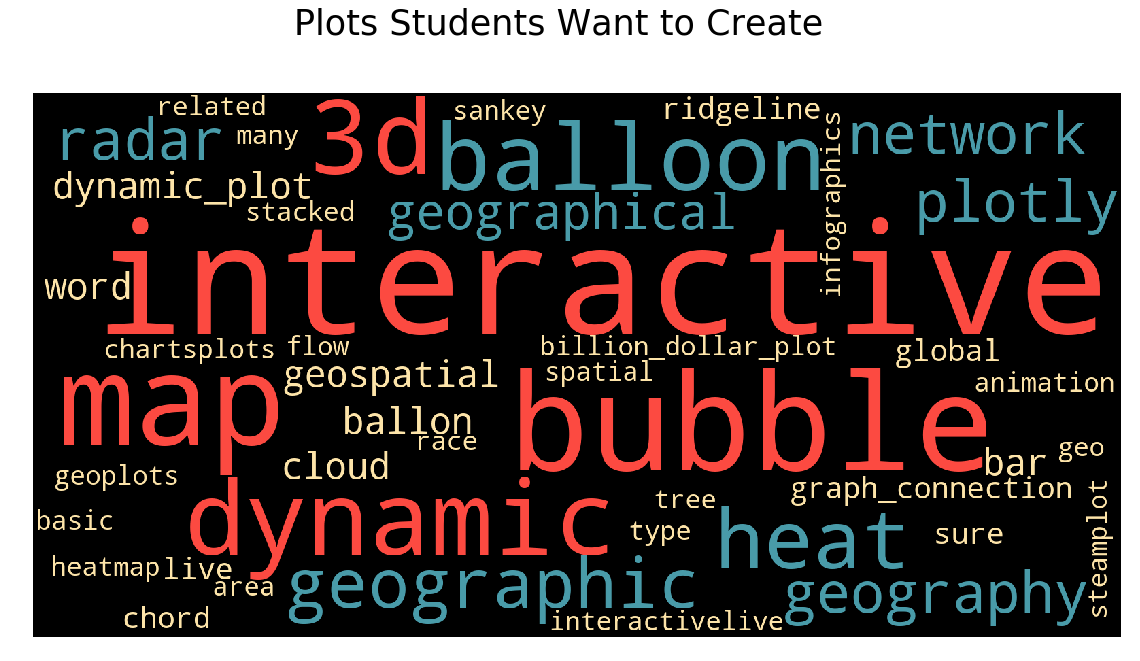

In [113]:
plt.figure( figsize=(20,10))
plt.suptitle('Plots Students Want to Create', size=35, y=1);      
plt.imshow(wc)
plt.axis("off")
plt.savefig('hw1.png')
# plt.tight_layout(pad=0)
# plt.show()